In [1]:
%load_ext autoreload

In [129]:
%autoreload
from tracer.pymobility.models.mobility import random_waypoint
from tracer.pymobility.models.mobility import random_direction
from tracer.pymobility.models.mobility import random_walk
from tracer.pymobility.models.mobility import stochastic_walk

In [130]:
rw = random_waypoint(2, dimensions=(1, 1), velocity=(0.1, 0.3), wt_max=1)
# rw = random_direction(100, dimensions=(1, 1), velocity=(0.1, 0.3), wt_max=1)
# rw = random_walk(100, dimensions=(1, 1), velocity=0.05)

In [131]:
import itertools
import numpy as np

# trace = np.array(list(itertools.islice(rw, 1)))
traces = []
for i in range(1000):
    traces.append(np.copy(next(rw)))

traces = np.array(traces)

In [132]:
traces.shape

(1000, 2, 2)

In [133]:
traces = traces.swapaxes(0, 1)

In [134]:
traces.shape

(2, 1000, 2)

Cycle #0: Switching from T[0.45626858 0.63472387] to T[0.45100106 0.52919209]
Cycle #1: Switching from T[0.45100106 0.52919209] to T[0.44573355 0.42366031]
Cycle #2: Switching from T[0.44573355 0.42366031] to T[0.44046604 0.31812853]
Cycle #3: Switching from T[0.44046604 0.31812853] to T[0.43025501 0.11355594]
Cycle #4: Switching from T[0.43025501 0.11355594] to T[0.33686953 0.27534185]
Cycle #5: Switching from T[0.33686953 0.27534185] to T[0.41982576 0.5671877 ]
Cycle #6: Switching from T[0.41982576 0.5671877 ] to T[0.65875465 0.54394953]
Cycle #7: Switching from T[0.65875465 0.54394953] to T[0.76089913 0.9216165 ]
Cycle #8: Switching from T[0.76089913 0.9216165 ] to T[0.55663002 0.71275421]
Cycle #9: Switching from T[0.55663002 0.71275421] to T[0.35236091 0.50389191]
Cycle #10: Switching from T[0.35236091 0.50389191] to T[0.1039581  0.24990353]
Cycle #11: Switching from T[0.1039581  0.24990353] to T[0.2831283  0.34189555]
Cycle #12: Switching from T[0.2831283  0.34189555] to T[0.5820

IndexError: index 1000 is out of bounds for axis 0 with size 1000

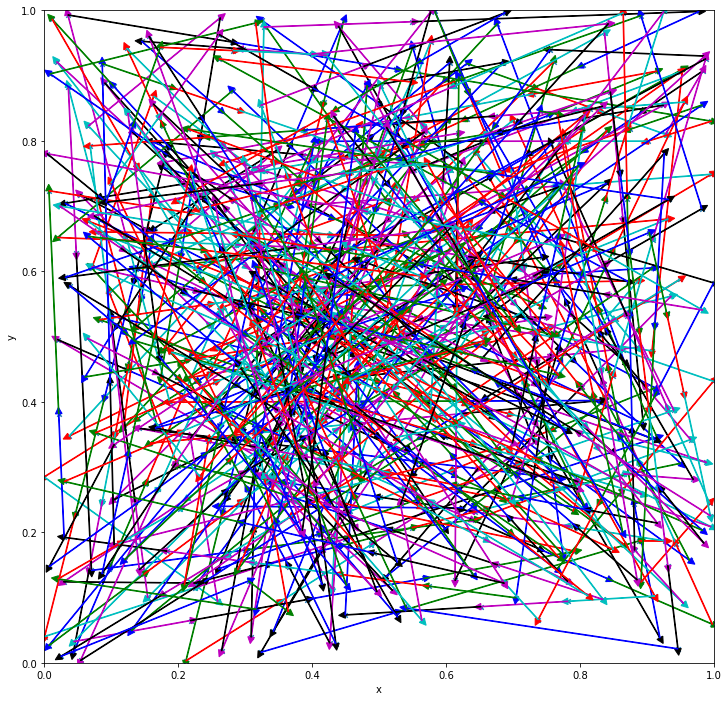

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

user_trace = traces[1]

df_trace = pd.DataFrame(user_trace, columns=['x', 'y'])
ax = df_trace.plot.scatter(
    x='x',
    y='y',
    ylim=(0, 1),
    xlim=(0, 1),
    figsize=(12, 12),
    marker='x'
)

cycol = itertools.cycle('bgrcmk')

# for i in range(trace.shape[1] - 1):
for i in range(1000):
    if all(user_trace[i] == user_trace[i + 1]):
        print(f'Cycle #{i}: Staying in tower T{user_trace[i]}')
        continue
    x1, y1 = user_trace[i]
    x2, y2 = user_trace[i + 1]

    print(f'Cycle #{i}: Switching from T{user_trace[i]} to T{user_trace[i + 1]}')
    color = next(cycol)
    ax.arrow(
        x1,
        y1,
        x2 - x1,
        y2 - y1,
        head_width=0.01,
        head_length=0.01,
        fc=color,
        ec=color
    )

plt.gca().set_aspect('equal', adjustable='box')
